In [62]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/fox_vs_nettekoven/corbetta_cerebellum_stroke_fluency'

# 01 - Begin Analysis

Enter the path to the dictionary generated by Notebook 01

In [63]:
dict_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/fox_vs_nettekoven/corbetta_cerebellum_stroke_fluency/rois/tmp/dataset_dict.json'

What correlation method would you like to use?
- Pearson is very fast, but depends on linearity and is sensitive to outliers
- Spearman is slower, but much more robust

In [64]:
correlation = 'spearman'

In [65]:
from calvin_utils.ccm_utils.npy_utils import DataLoader
from calvin_utils.ccm_utils.stat_utils import CorrelationCalculator
data_loader = DataLoader(dict_path)
correlation_calculator = CorrelationCalculator(method=correlation, verbose=False)
corr_map_dict = correlation_calculator.generate_correlation_maps(data_loader)

Evaluating Corbetta Stroke Cerebellum


# 02 - Use LOOCV to Train a Convergent Map on N-1 Datasets, Then Test it on the Nth dataset

Enter a list of datasets you want to flip (multiply correlation map by -1)
- This is typically done to control for sign inversion, enabling testing of topology specifically. 

In [66]:
datasets_to_flip = [] #'fornix_memory', 'adni_Alzheimer', 'corbetta_memory', 'grafmann_memory', 'manitoba_memory', 'ms_memory', 'kim_tms', 'hebscher_tms']

Generate the Convergent Maps and Save the Individual Correlation Maps

In [84]:
from calvin_utils.ccm_utils.convergent_loocv import LOOCVAnalyzer
loocv_analyzer = LOOCVAnalyzer(corr_map_dict, data_loader, 
                               similarity='avg_in_subject',
                               method=correlation,
                               out_dir=out_dir,
                               mask_path='/Users/cu135/hires_backdrops/MNI/MNI152_T1_2mm_brain_mask.nii',
                               roi_path='/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/fluency_noncerebellar/redo_pearson/animal_raw_acute_uncorrected_results.nii.gz',
                               )

Removing NaNS from self.coor_map_dict.


Run LOOCV

No training required--loading user-defined ROI file


<Figure size 432x432 with 0 Axes>

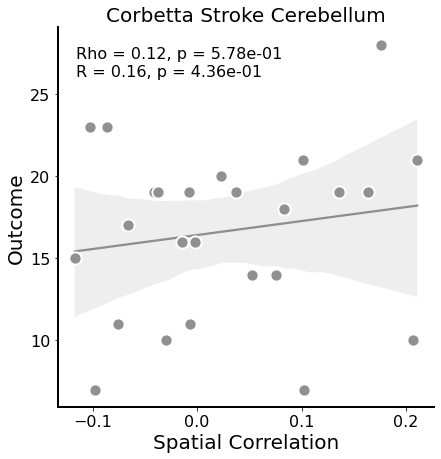

In [85]:
loocv_analyzer.run()

That's all

-Calvin